In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('../CSV/MSFT_kaggle.csv', na_values=['null'], index_col='Date', parse_dates=True,infer_datetime_format=True)

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


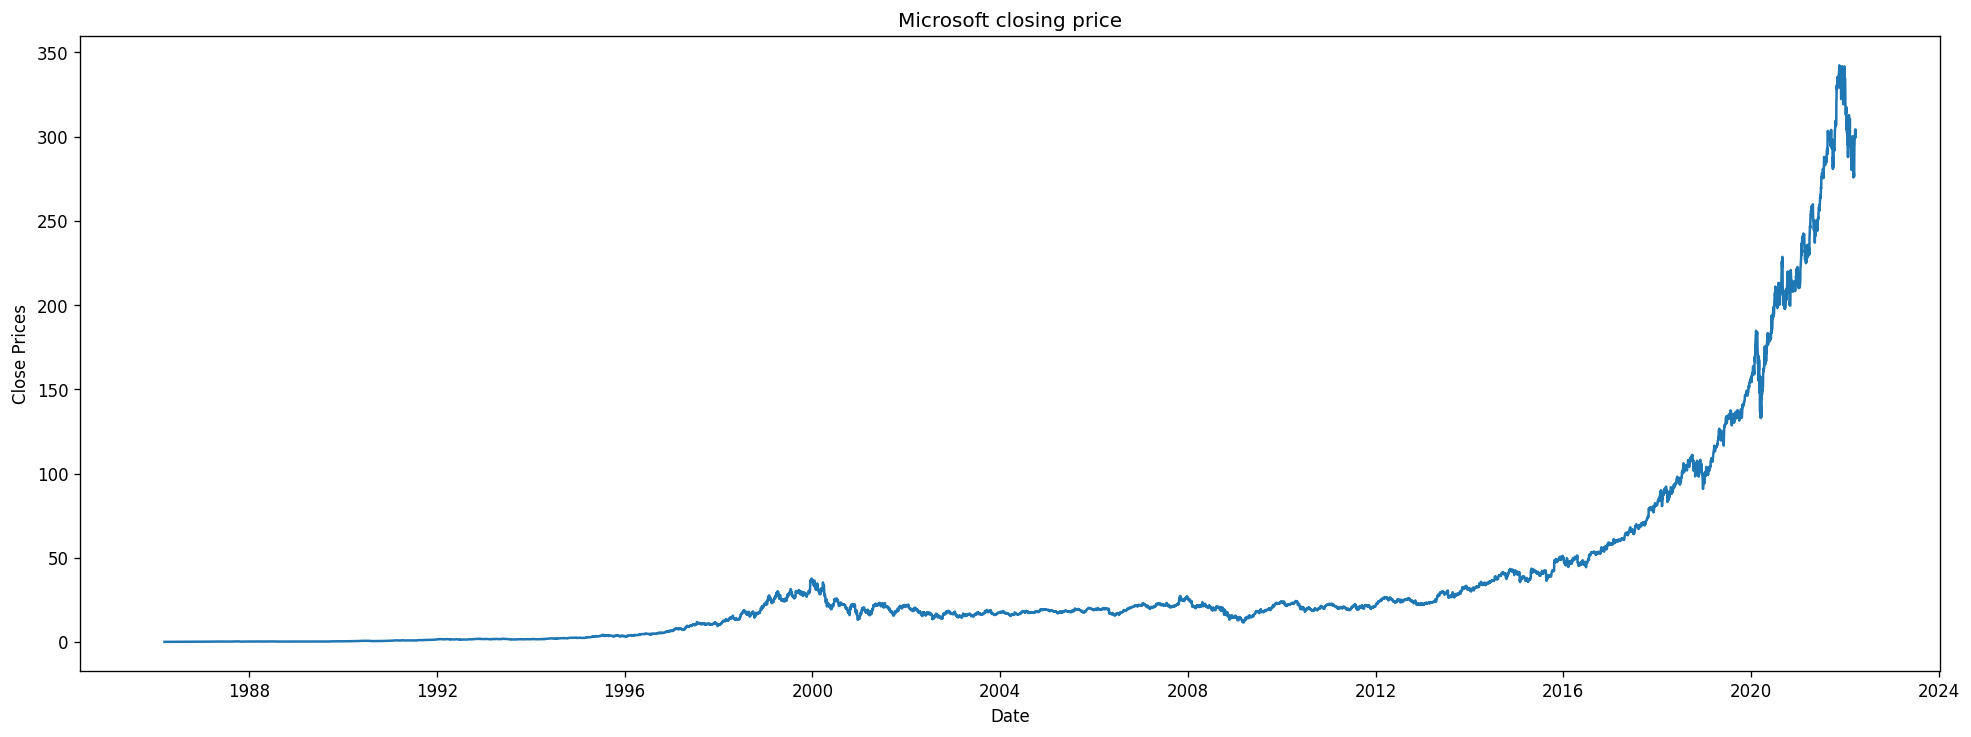

In [8]:
#plot close price
plt.figure(figsize=(20,7), dpi=120)
# plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Adj Close'])
plt.title('Microsoft closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

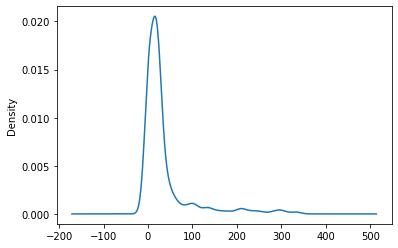

In [9]:
#Distribution of the dataset
df_close = stock_data['Adj Close']
df_close.plot(kind='kde')

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()

  #Plot rolling statistics:
  plt.figure(figsize=(20,7), dpi=120)
  plt.plot(timeseries, color='blue',label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
  print("Results of dickey fuller test")
  adft = adfuller(timeseries,autolag='AIC')
  # output for dft will give us without defining what the values are.
  #hence we manually write what values does it explains using a for loop
  output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
  print(output)
test_stationarity(df_close)